# Salary Predictions Based on Job Descriptions - 1. EDA

In [56]:
# my info here
__author__ = "Tomo Shimo"
__email__ = "tomo.krmr@gmail.com"

In [93]:
# %load_ext pycodestyle_magic
# %flake8_on
%flake8_off

# Part 1 - DEFINE

### ---- 1 Define the problem ----

This is the salary prediction project; we predict the salary based on the job descriptions.
We are going to make a model.
If we obtain a new job description, we can predict the salary for this new job with using this model.

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [59]:
# import the libraries we use
import pandas as pd
import sklearn as sk
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# to import original modules from ../src
import sys
# sys.path.append('..')

from src.data import load_data
# import original module for visualize
from src.visualization import visualize

1: E999 SyntaxError: invalid syntax
6:1: E402 module level import not at top of file
7:1: E402 module level import not at top of file
10:1: E402 module level import not at top of file
13:1: E402 module level import not at top of file
15:1: E402 module level import not at top of file


In [60]:
# Load the "autoreload" extension so that code can change
%load_ext autoreload
# always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1: E999 SyntaxError: invalid syntax


In [61]:
dir(load_data)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'check_df',
 'load_data',
 'os',
 'pd']

In [62]:
data_path = '../data/raw/'

In [63]:
# load the data into a Pandas dataframe
df_features = load_data.load_data(data_path, 'train_features.csv')
df_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [64]:
df_features.count()

jobId                  1000000
companyId              1000000
jobType                1000000
degree                 1000000
major                  1000000
industry               1000000
yearsExperience        1000000
milesFromMetropolis    1000000
dtype: int64

In [65]:
df_salaries = load_data.load_data(data_path, 'train_salaries.csv')
df_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [66]:
df_salaries.count()

jobId     1000000
salary    1000000
dtype: int64

Both dataset have same count of the data. We can join these according to job id.

### ---- 3 Clean the data ----

In [67]:
# look for duplicate data, invalid data (e.g. salaries <=0),
# or corrupt data and remove it
load_data.check_df(df_features)

# of NaN
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

 # of Duplicate
0


In [68]:
load_data.check_df(df_salaries)

# of NaN
jobId     0
salary    0
dtype: int64

 # of Duplicate
0


There's no NaN value in the data.
Also, I checked the salary value which is less than 0.

In [69]:
df_salaries.query('salary <= 0')

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


There are 5 jobs which salary is 0. I decided to remove these.

In [70]:
df_salaries_mod = df_salaries.query('salary > 0')

Then I marged these two data.

In [71]:
df = pd.merge(df_salaries_mod, df_features, how="inner", on="jobId")


### ---- 4 Explore the data (EDA) ----

`jobId` is unique for each row. This feature doesn't seem important. 
`yearsExperience` and `milesFromMetropolis` are numerical value.
`companyId`, `jobType`, `degree`, `major` and `industry` are categorical value.

In [72]:
# summarize each feature variable
df.describe(include="all")

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
count,999995,999995.000000,999995,999995,999995,999995,999995,999995.000000,999995.000000
unique,999995,NaN,63,8,5,9,7,NaN,NaN
top,JOB1362684439458,NaN,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN
freq,1,NaN,16193,125886,236975,532353,143205,NaN,NaN
mean,NaN,116.062398,NaN,NaN,NaN,NaN,NaN,11.992407,49.529381
std,NaN,38.717163,NaN,NaN,NaN,NaN,NaN,7.212390,28.877721
min,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,88.000000,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000
50%,NaN,114.000000,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000
75%,NaN,141.000000,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000


Here is the distribution of `salary`.

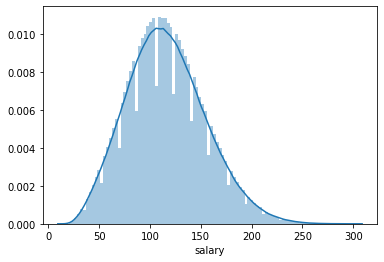

In [92]:
# summarize the target variable

sns.distplot(df_salaries_mod['salary'], 100,
             "salary", "Distribution of salary")

## Numerical features

From this correlation table, `salary` is *positively* correlated with `years of experience` and *negatively* correlated with `miles from metropolis`.

In [74]:
# look for correlation between each feature and the target
# look for correlation between features
df.corr()

,salary,yearsExperience,milesFromMetropolis
salary,1.000000,0.375013,-0.297686
yearsExperience,0.375013,1.000000,0.000672
milesFromMetropolis,-0.297686,0.000672,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1132a5190>,
      dtype=object)

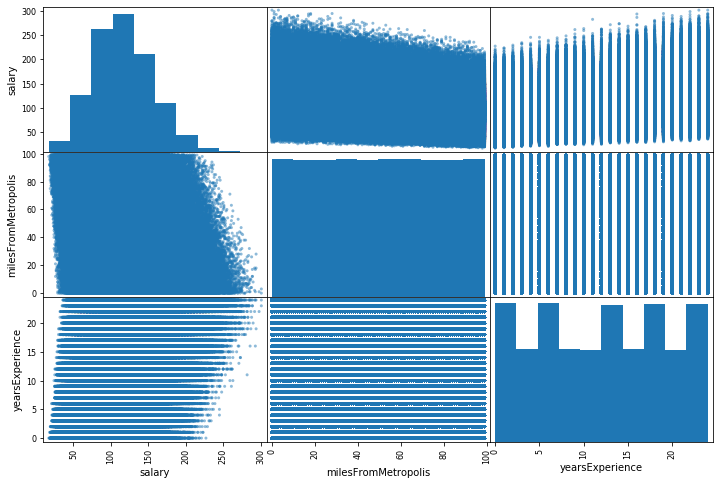

3:43: E231 missing whitespace after ','


In [75]:
from pandas.plotting import scatter_matrix
attributes = ["salary", "milesFromMetropolis", "yearsExperience"]
scatter_matrix(df[attributes], figsize=(12,8))

## Categorical features

## jobType, Degree and Industry
These features are same order of counts for each categories. 

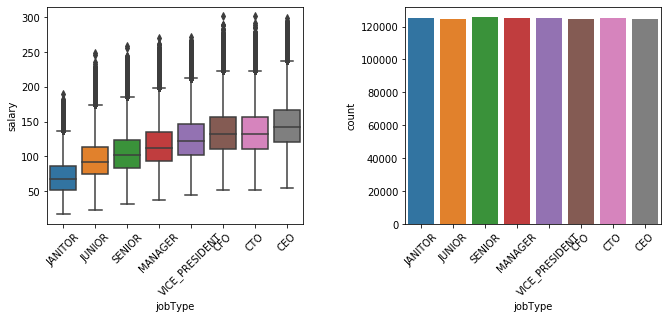

In [76]:
visualize.cat_boxplot_and_count(df, 'salary', 'jobType')

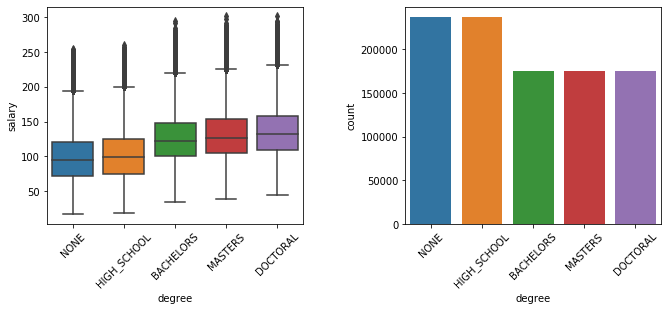

In [77]:
visualize.cat_boxplot_and_count(df, 'salary', 'degree')

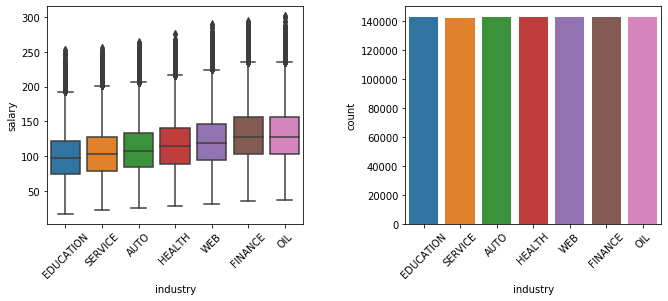

In [78]:
visualize.cat_boxplot_and_count(df, 'salary', 'industry')

## major
The feature `major` has a lot of counts in `NONE`.

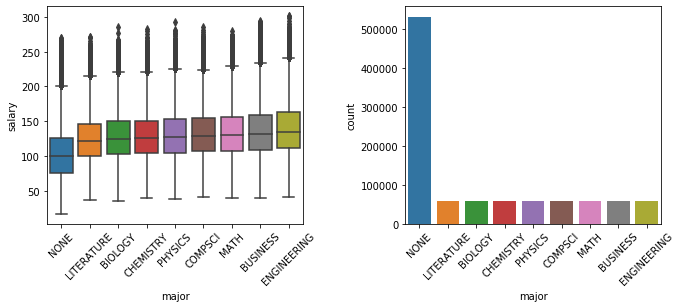

In [79]:
visualize.cat_boxplot_and_count(df, 'salary', 'major')

## companyId
This feature has 63 unique values. 

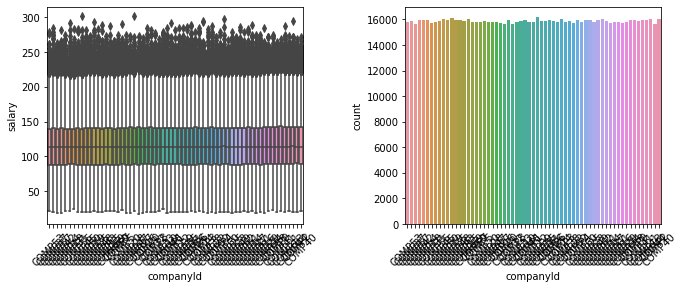

In [80]:
visualize.cat_boxplot_and_count(df, 'salary', 'companyId')

It's very difficult to see companyId.

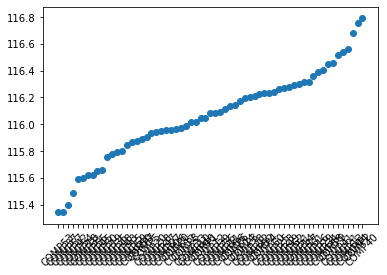

In [81]:
df_companies = df.groupby(['companyId'], as_index=False).mean()
df_companies_sorted = df_companies.sort_values(by='salary')
plt.xticks(rotation=45)
plt.scatter(df_companies_sorted['companyId'], df_companies_sorted['salary'])

Let's exract only numbers to see the numbers is related to its mean of salary.

In [82]:
df['compId_num'] = df['companyId'].str.extract(r'([0-9]+)')

In [83]:
df['compId_num'] = pd.to_numeric(df['compId_num'])

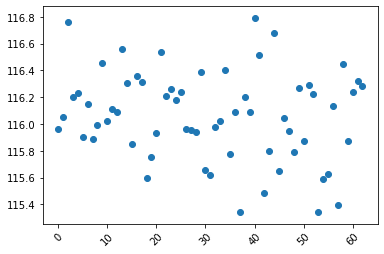

In [84]:
df_compId = df.groupby(['compId_num'], as_index=False).mean()
df_compId_sorted = df_compId.sort_values(by='salary')
plt.xticks(rotation=45)
plt.scatter(df_compId_sorted['compId_num'], df_compId_sorted['salary'])

The company id number itself looks like very slightly related to its mean salary.

Accoding to the means of categorical features, `jobType` and `degree` are correlated with `salary` stronger than `major` and `companyId`.

## Correlation between the features

Next, let's see the correlation between the features. From above data analysis, we seek the correlation among `jobType`, `industry`, and `degree`.

This is the correlation between `jobType` and `degree`.

salary                                                
degree           BACHELORS    DOCTORAL HIGH_SCHOOL     MASTERS        NONE
jobType                                                                   
CEO             148.421009  158.232849  135.629182  153.254510  130.796690
CFO             138.508706  148.308742  125.964395  143.316243  121.135389
CTO             138.363172  148.269262  126.082232  143.582019  120.939193
VICE_PRESIDENT  128.196227  138.491400  115.758343  133.077062  111.207654
MANAGER         118.173795  128.211800  106.068086  123.389176  100.981070
SENIOR          108.325539  118.867134   95.908637  113.408824   90.628738
JUNIOR           98.130267  108.356035   85.791986  103.463304   80.884064
JANITOR           0.000000    0.000000   70.976821    0.000000   70.649575

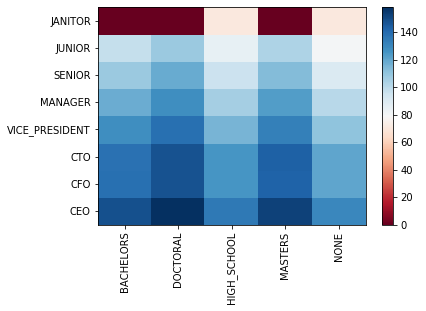

In [85]:
visualize.sorted_pivot(df, 'salary', 'jobType', 'degree')

Below is the correlation between `jobType` and `industry`.

salary                                                  \
industry              AUTO   EDUCATION     FINANCE      HEALTH         OIL   
jobType                                                                      
CEO             139.126480  128.306144  159.916932  145.115908  160.464799   
CFO             128.866016  118.775361  149.955314  134.687750  150.337443   
CTO             128.759346  118.703032  150.041805  135.680892  150.113902   
VICE_PRESIDENT  118.674694  108.498984  140.078083  124.834675  140.323687   
MANAGER         108.540599   98.944513  129.955841  115.105228  130.233432   
SENIOR           98.878101   88.832586  120.429226  105.141989  119.970093   
JUNIOR           88.671121   78.878164  110.226984   95.122034  110.154901   
JANITOR          64.741013   55.204577   85.120400   70.309998   85.307827   

                                        
industry           SERVICE         WEB  
jobType                                 
CEO             133.350280  150.710337  
CFO             124.122543  141.181463  
CTO             123.428858  141.603892  
VICE_PRESIDENT  113.517558  131.446657  
MANAGER         103.796372  120.930051  
SENIOR           93.949206  111.170494  
JUNIOR           83.558421  101.136843  
JANITOR          60.205064   75.038813

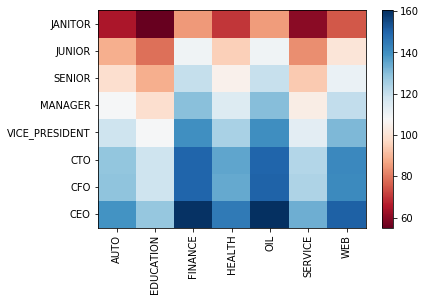

In [86]:
visualize.sorted_pivot(df, 'salary', 'jobType', 'industry')

salary                                                  \
industry           AUTO   EDUCATION     FINANCE      HEALTH         OIL   
degree                                                                    
DOCTORAL     128.074435  118.323663  150.641405  135.117068  150.744987   
MASTERS      123.239183  113.140163  145.283442  130.545277  145.605445   
BACHELORS    118.234848  107.975063  140.375583  125.444964  140.997392   
HIGH_SCHOOL   95.808696   86.298461  116.183275  101.549296  116.307842   
NONE          92.340695   82.281235  112.638157   97.286797  112.649746   

                                     
industry        SERVICE         WEB  
degree                               
DOCTORAL     123.018179  142.313758  
MASTERS      118.299083  137.241080  
BACHELORS    113.233762  132.100092  
HIGH_SCHOOL   91.241363  105.994693  
NONE          87.404719  102.748705

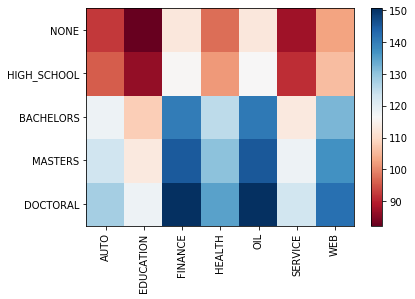

In [87]:
visualize.sorted_pivot(df, 'salary', 'degree', 'industry')

`jobType` and `degree` are strongly correlated. And other 2 pairs are slightly correlated.

### ---- 5 Establish a baseline ----

Aiming MSE < 360
At first, the salary considered to have a *linear relationship* with the years of experience.


### Linear Model

In [88]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['yearsExperience']], df['salary'])
print("Salary = " + str(lm.coef_[0]) + " * yearsExperience + "
      + str(lm.intercept_))

Salary = 2.013126778161152 * yearsExperience + 91.92016272211305


In [89]:
y_hat = lm.coef_[0] * df[['yearsExperience']] + lm.intercept_
sk.metrics.mean_squared_error(y_hat, df['salary'])

1288.2028743217443

In [90]:
# during 5-fold cross-validation
Rcross = sk.model_selection.cross_val_score(
    lm, df[['yearsExperience']], df['salary'], cv=5)
Rcross

array([0.14132088, 0.14246846, 0.13849021, 0.13882048, 0.14201107])

In [91]:
print("The mean of the folds are", Rcross.mean(),
      "and the standard deviation is", Rcross.std())

The mean of the folds are 0.14062221908143077 and the standard deviation is 0.001650294899680516


The MSE (Mean Squared Error) is 1288. 

### Save the df to csv

In [96]:
output_path = '../data/interim/'
load_data.save_data(output_path, df, 'data.csv')

### ---- 6 Hypothesize solution ----